# Introduction
Hello, I continue to learn from where I left off. This project is my fifteenth project in my learning way and I will continue to develop the projects from now on. In this project, Firstly I will review the dataset and I will visualize in data of the dataset. After, I will constitute the Convolutional Neural Network(CNN) model with the Keras API. I will explain what I did step by step. I've talked about the projects I've done before and I will share them in this chapter. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/competitions/digit-recognizer)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Data Review](#1)
- [Prepare The Dataset](#2)
    - [Normalization](#ptd1)
    - [Train Val Split](#ptd2)
- [Convolutional Neural Network(CNN)](#3)
    - [Implementing With Keras](#cnn1)
    - [Define Optimizer](#cnn2)
    - [Compile Model](#cnn3)
    - [Epochs And Batch Size](#cnn4)
    - [Data Augmentation](#cnn5)
    - [Fit The Model](#cnn6)
    - [Evaluate The Model](#cnn7)
    - [Prediction The Validation And Test Datasets](#cnn8)
        - [Prediction validation results](#pre1)
        - [Prediciting test classes](#pre2)
- [CONCLUSION](#4)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Data Review <a id = "1"></a>
[Go Content](#cont) <br>
In this chapter, I will review the dataset. 

I read the dataset with the pandas library.

In [2]:
# read traim
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train.shape)
train

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read test
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test.shape)
test

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I specify X_train and Y_train from the train dataset.

In [4]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"], axis = 1)

I visualize the label column of data from the train dataset.

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

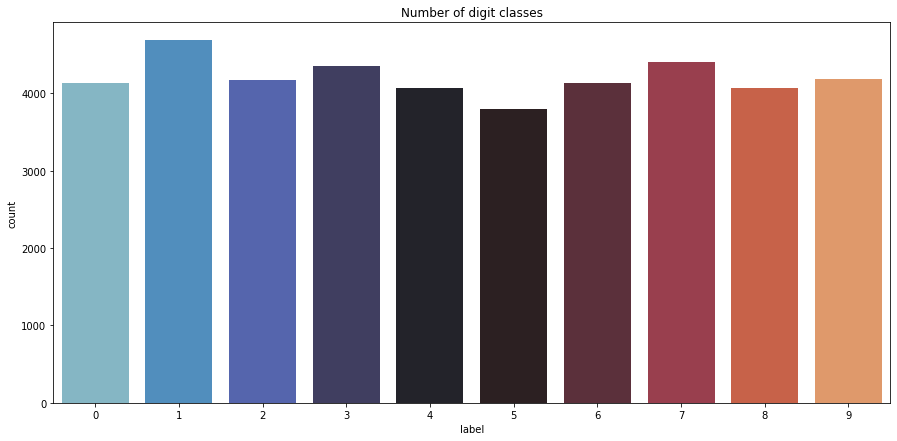

In [5]:
# visualize
plt.figure(figsize = (15,7))
sns.countplot(Y_train, palette = "icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

I visualize an image in the X_train dataset.

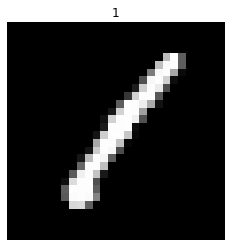

In [6]:
# plot some sample
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap = "gray")
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

I visualize an image in the X_train dataset.

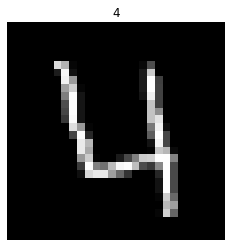

In [7]:
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap = "gray")
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

# Prepare The Dataset <a id = "2"></a>
[Go Content](#cont) <br>
In this chapter, I will prepare the dataset for the CNN model.

## Normalization <a id = "ptd1"></a>
[Go Content](#cont) <br>
In this chapter, I normalize the X_train and the test datasets.

In [8]:
# Normalization
X_train = X_train / 255.0
test = test / 255.0
print("X_train shape", X_train.shape)
print("test shape", test.shape)

X_train shape (42000, 784)
test shape (28000, 784)


In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ", X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


to_categorical : Converts a class vector (integers) to binary class matrix. <br>
I convert the Y_train to a binary class matrix with to_categorical.

In [10]:
# label encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

## Train Val Split <a id = "ptd2"></a>
[Go Conten](#cont) <br>
I split the X_train and Y_train datasets into train and val.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape",x_train.shape)
print("x_val shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


I visualize an image in the x_train.

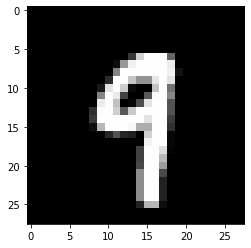

In [12]:
plt.imshow(x_train[2][:,:,0], cmap = "gray")
plt.show()

# Convolutional Neural Network(CNN) <a id = "3"></a>
[Go Content](#cont) <br>

**What is The Convolutional Neural Network(CNN)?** <br>

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

The more information on Convolutional Neural Network(CNN) model for [click here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

In this chapter, I will apply The CNN model to the dataset.

## Implementing With Keras <a id = "cnn1"></a>
[Go Content](#cont) <br>

In this chapter, I constitute the CNN model with Keras. <br>

**What is the Keras?** <br>

Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation. 

In [13]:
# İmport Library
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam # from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Create Model
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

2022-08-25 18:38:41.918797: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Define Optimizer <a id = "cnn2"></a>
[Go Content](#cont) <br>

I constitute the optimizer in this chapter. I determine variables such as learning rate. These variables determine our learning time and accuracy during training.

In [14]:
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

## Compile Model <a id = "cnn3"></a>
[Go Content](#cont) <br>

I constitute the compile model. I use compile model because I calculate the loss.

In [15]:
# compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

## Epochs And Batch Size <a id = "cnn4"></a>
[Go Content](#cont) <br>

- one epoch = one forward pass and one backward pass of all the training examples
- batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

In [16]:
epochs = 20 # Training step
batch_size = 250 # 

## Data Augmentation <a id = "cnn5"></a>
[Go Content](#cont) <br>

In this chapter, I widen the x_train dataset with new data. I constitute new image data.

In [17]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 15,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False)

datagen.fit(x_train)

## Fit The Model <a id = "cnn6"></a>
[Go Content](#cont) <br>

In [18]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                             epochs = epochs, validation_data = (x_val, y_val), steps_per_epoch = x_train.shape[0] // batch_size)

2022-08-25 18:38:42.536815: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
151/151 [==============================] - 18s 113ms/step - loss: 1.1462 - accuracy: 0.6060 - val_loss: 0.1754 - val_accuracy: 0.9538
Epoch 2/20
151/151 [==============================] - 17s 112ms/step - loss: 0.4044 - accuracy: 0.8753 - val_loss: 0.1037 - val_accuracy: 0.9683
Epoch 3/20
151/151 [==============================] - 17s 115ms/step - loss: 0.2833 - accuracy: 0.9119 - val_loss: 0.0871 - val_accuracy: 0.9743
Epoch 4/20
151/151 [==============================] - 17s 112ms/step - loss: 0.2204 - accuracy: 0.9340 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 5/20
151/151 [==============================] - 17s 113ms/step - loss: 0.1792 - accuracy: 0.9449 - val_loss: 0.0609 - val_accuracy: 0.9798
Epoch 6/20
151/151 [==============================] - 17s 116ms/step - loss: 0.1633 - accuracy: 0.9511 - val_loss: 0.0530 - val_accuracy: 0.9824
Epoch 7/20
151/151 [==============================] - 17s 112ms/step - loss: 0.1490 - accuracy: 0.9539 - val_loss: 0.0500 - val_ac

## Evaluate The Model <a id = "cnn7"></a>
[Go Content](#cont) <br>

I visualize the results of training.

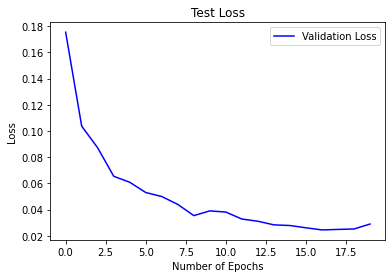

In [19]:
plt.plot(history.history["val_loss"], color = "b", label = "Validation Loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

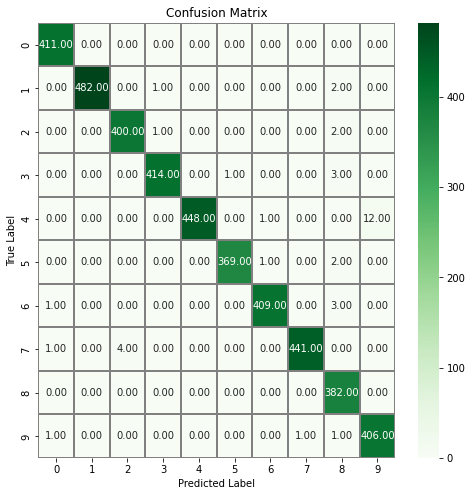

In [20]:
# confusion matrix
# Predict the value from the validation dataset
Y_pred = model.predict(x_val)
# Convert Predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert Validation observation to one hot vectors
Y_true = np.argmax(y_val, axis = 1)
# Compute the confision matrix
condision_mtrx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(condision_mtrx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".2f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Prediction The Validation And Test Datasets <a id = "cnn8"></a>
[Go Content](#cont) <br>

I predict the val and test dataset. I visualize the results.

###  Prediction validation results <a id = "pre1"></a>
[Go Content](#cont)

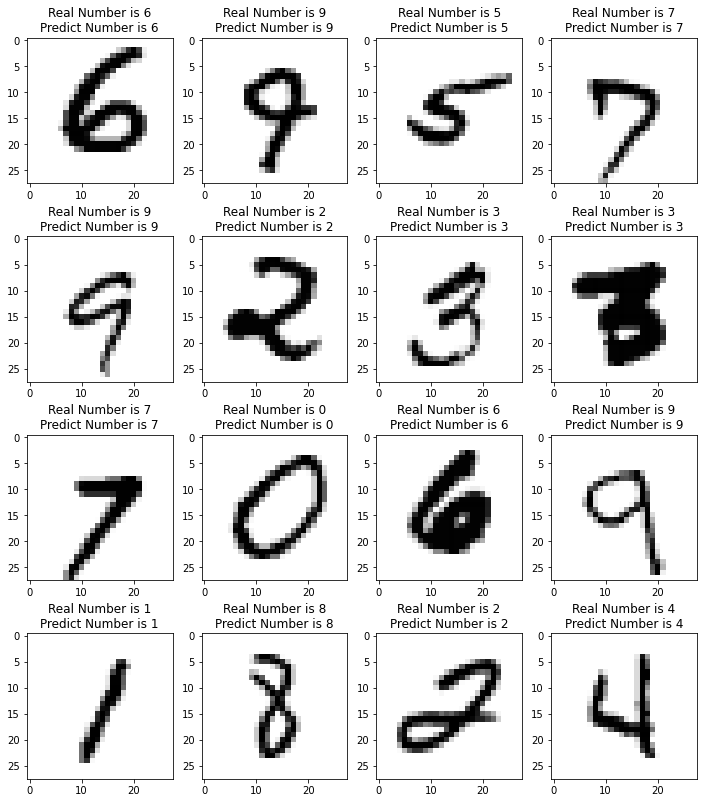

In [21]:
x_val_test =  x_val.reshape(x_val.shape[0], 28, 28)

fig , axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_val_test[i], cmap = 'binary')
    ax.set(title = f"Real Number is {y_val[i].argmax()}\nPredict Number is {Y_pred[i].argmax()}");

### Prediciting test classes <a id = "pre2"></a>
[Go Content](#cont)

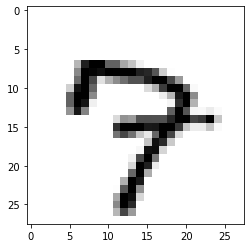

Previsto : [2 0 9 ... 3 9 2]
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [22]:
y_pred_test = model.predict(test)
y_pred_test = np.argmax(y_pred_test,axis=1)

i = 5
plt.imshow(test[i].reshape(28,28), cmap = plt.cm.binary)
plt.show()
print('Previsto : {}'.format(y_pred_test))

result = pd.Series(y_pred_test, name = "Label")
submission = pd.concat([pd.Series(range(1, len(y_pred_test)+1), name = "ImageId"), result], axis = 1)
print(submission.head(10))
submission.to_csv("mlp_mnist_v1.csv", index = False)

# CONCLUSION <a id = "4"></a>
****
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.